In [1]:
# Simple Scatter Plots 

%matplotlib inline 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-whitegrid")
import numpy as np 

/tmp/ipykernel_433838/883738726.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


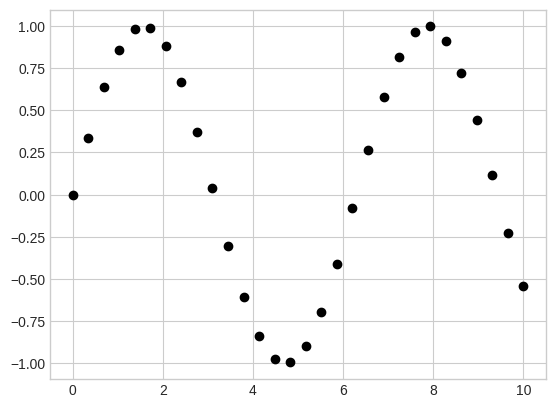

In [2]:
# Scatter Plots with plt.plot

x = np.linspace(0,10,30)
y = np.sin(x)

plt.plot(x,y,"o",color="black")


(0.0, 1.8)

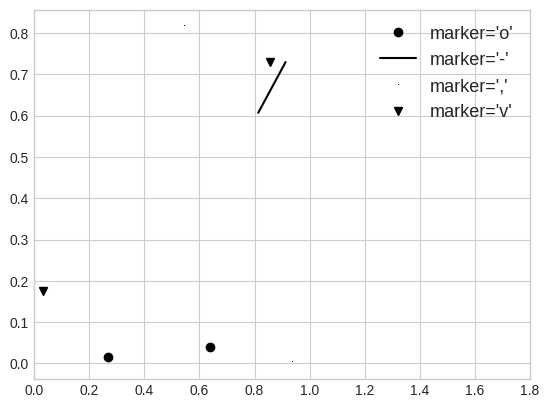

In [3]:
rng = np.random.default_rng(0)
for marker in ["o","-",",","v"]:
    plt.plot(rng.random(2), rng.random(2), marker, color="black", 
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1, fontsize=13)
plt.xlim(0,1.8)

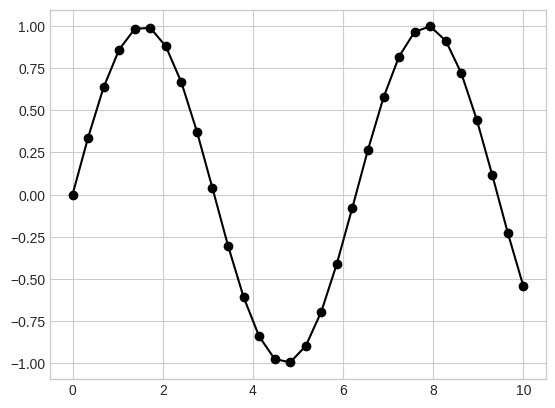

In [4]:
plt.plot(x,y,"-ok")

(-1.2, 1.2)

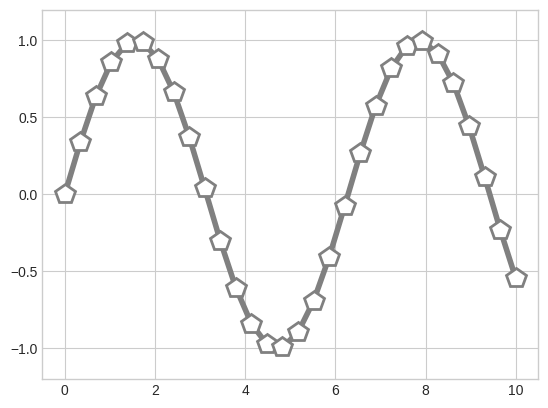

In [5]:
plt.plot(
    x,y, "-p", color="gray",
    markersize=15, linewidth=4,
    markerfacecolor="white",
    markeredgecolor="gray",
    markeredgewidth=2
)
plt.ylim(-1.2,1.2)

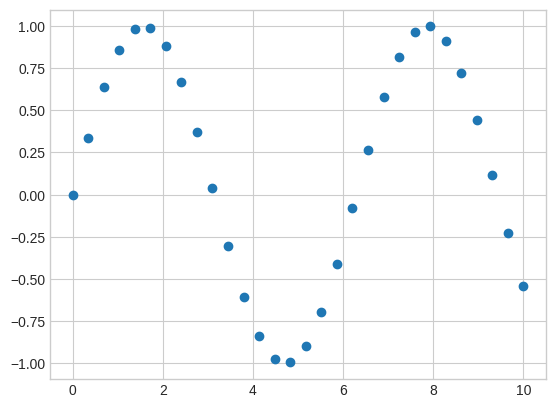

In [7]:
# Scatter Plots with plt.scatter
plt.scatter(x,y,marker="o")

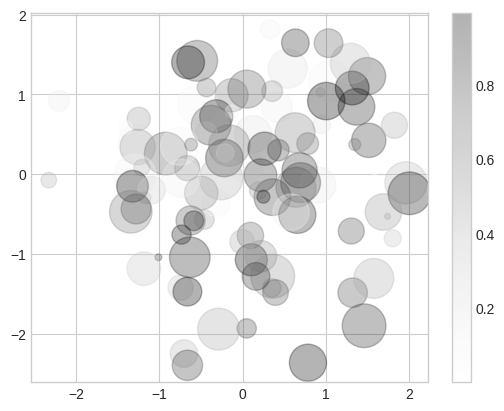

In [8]:
rng = np.random.default_rng(0)
x = rng.normal(size= 100)
y = rng.normal(size= 100)
colors = rng.random(100)
sizes = 1000 * rng.random(100)

plt.scatter(x,y, c=colors, s=sizes, alpha=0.3)
plt.colorbar(); # show color scale 

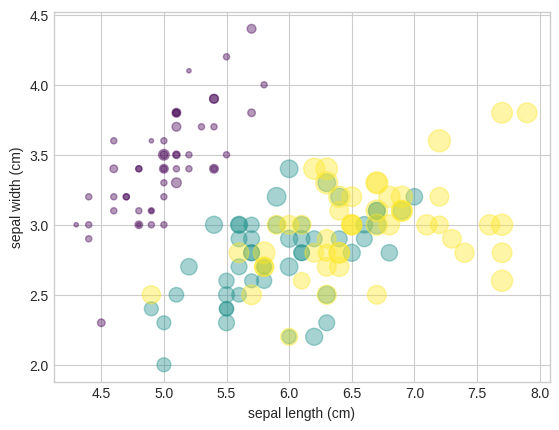

In [9]:
# визуализируем цветочки 
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(
    features[0],    # sepal length
    features[1],    # sepal width 
    alpha=0.4,
    s=100*features[3], 
    c=iris.target,
    cmap="viridis"
)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

/tmp/ipykernel_433838/2604612408.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


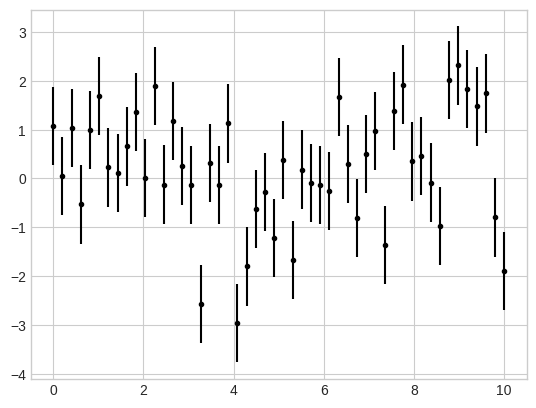

In [12]:
# basic errorbars 
# ошибки показывают чрезмерное отклонение значений

%matplotlib inline 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-whitegrid")
import numpy as np 

x = np.linspace(0,10,50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x,y, yerr=dy, fmt=".k");

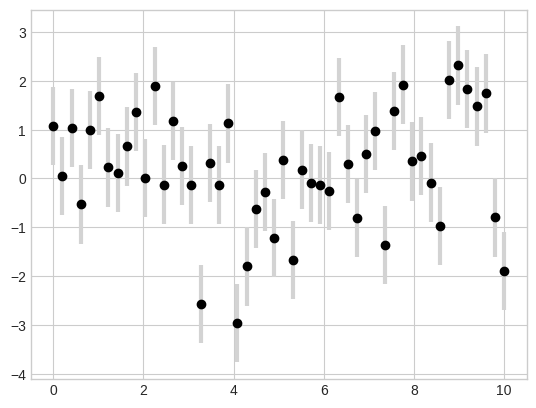

In [13]:
plt.errorbar(x,y, yerr=dy, fmt='o', color="black", 
             ecolor="lightgray", elinewidth=3, capsize = 0);


In [14]:
# Continuous Errors 
# как видим чтобы нарисовать линию из набора значений 
# нам потребуется регрессор - то есть модель машинного обучения 
# которая эти точки нам и вычислит

from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data 
model = lambda x: x * np.sin(x)
xdata = np.array([1,3,5,6,8])
ydata = model(xdata)

# compute the gaussian process fit 
gp = GaussianProcessRegressor()
gp.fit(xdata[:,np.newaxis], ydata)

xfit = np.linspace(0,10,1000)
yfit,dyfit = gp.predict(xfit[:,np.newaxis], return_std=True)

(0.0, 10.0)

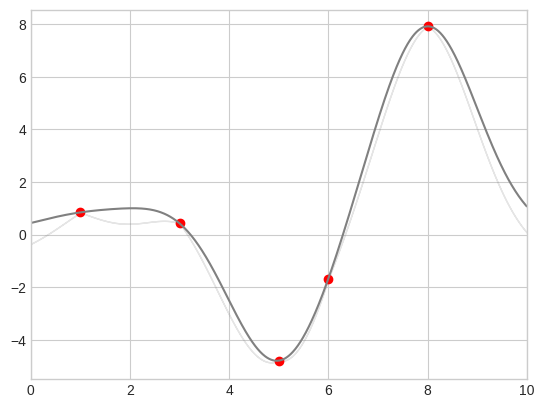

In [15]:
# visualize the result 
plt.plot(xdata, ydata, "or")
plt.plot(xfit, yfit, "-", color="gray")
plt.fill_between(xfit, yfit - dyfit, yfit - dyfit, color="gray", alpha=0.2)
plt.xlim(0,10)